In [7]:
import pandas as pd

pd.set_option('display.max_columns', None)

data = pd.read_csv('train.csv')
data.head(10)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,NaN,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,NaN,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
5,6,50,RL,85.0,14115,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,1Fam,1.5Fin,5,5,1993,1995,Gable,CompShg,VinylSd,VinylSd,NaN,0.0,TA,TA,Wood,Gd,TA,No,GLQ,732,Unf,0,64,796,GasA,Ex,Y,SBrkr,796,566,0,1362,1,0,1,1,1,1,TA,5,Typ,0,NaN,Attchd,1993.0,Unf,2,480,TA,TA,Y,40,30,0,320,0,0,NaN,MnPrv,Shed,700,10,2009,WD,Normal,143000
6,7,20,RL,75.0,10084,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Somerst,Norm,Norm,1Fam,1Story,8,5,2004,2005,Gable,CompShg,VinylSd,VinylSd,Stone,186.0,Gd,TA,PConc,Ex,TA,Av,GLQ,1369,Unf,0,317,1686,GasA,Ex,Y,SBrkr,1694,0,0,1694,1,0,2,0,3,1,Gd,7,Typ,1,Gd,Attchd,2004.0,RFn,2,636,TA,TA,Y,255,57,0,0,0,0,NaN,NaN,NaN,0,8,2007,WD,Normal,307000
7,8,60,RL,NaN,10382,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NWAmes,PosN,Norm,1Fam,2Story,7,6,1973,1973,Gable,CompShg,HdBoard,HdBoard,Stone,240.0,TA,TA,CBlock,Gd,TA,Mn,ALQ,859,BLQ,32,216,1107,GasA,Ex,Y,SBrkr,1107,983,0,2090,1,0,2,1,3,1,TA,7,Typ,2,TA,Attchd,1973.0,RFn,2,484,TA,TA,Y,235,204,228,0,0,0,NaN,NaN,Shed,350,11,2009,WD,Normal,200000
8,9,50,RM,51.0,6120,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Artery,Norm,1Fam,1.5Fin,7,5,1931,1950,Gable,CompShg,BrkFace,Wd Shng,NaN,0.0,TA,TA,BrkTil,TA,TA,No,Unf,0,Unf,0,952,952,GasA,Gd,Y,FuseF,1022,752,0,1774,0,0,2,0,2,2,TA,8,Min1,2,TA,Detchd,1931.0,Unf,2,468,Fa,TA,Y,90,0,205,0,0,0,NaN,NaN,NaN,0,4,2008,WD,Abnorml,129900
9,10,190,RL,50.0,7420,Pave,NaN,Reg,Lvl,AllPub,Corner,Gtl,BrkSide,Artery,Artery,2fmCon,1.5Unf,5,6,1939,1950,Gable,CompShg,MetalSd,MetalSd,NaN,0.0,TA,TA,BrkTil,TA,TA,No,GLQ,851,Unf,0,140,991,GasA,Ex,

Separando dados Numéricos

In [8]:
# Separar Dados Numéricos

def ObterDadosNumericos(file) -> list:

    fileCopy  = pd.DataFrame(file.copy())

    listaNumerica = []


    # Tratar LotFrontage
    
    dfTratarDadosNan = fileCopy.apply(
            lambda x: pd.Series(x, index=['LotFrontage', 'MasVnrArea', 'GarageYrBlt']).fillna(0), axis=1
    )
    
    for columns in dfTratarDadosNan.columns:
        for itemsFileCopy in fileCopy.columns:
            if (columns == itemsFileCopy):
                fileCopy[itemsFileCopy] = dfTratarDadosNan[columns]
        
    for coluna in fileCopy.values:
        dadoNumerico = pd.to_numeric(coluna, errors='coerce')
        listaNumerica.append(dadoNumerico)
        
    
    return pd.DataFrame(listaNumerica).dropna(axis=1)
    
fileNumerica = ObterDadosNumericos(data)


def TratarColunasText(var_tratar_columns, file_principal):
    
    copy_columns = file_principal.copy()
    
    listColumnsNames = []
    
    pd.DataFrame(var_tratar_columns)
    
    for index, i in enumerate(copy_columns):
        for items_columns_index in var_tratar_columns.columns:
            if (index == items_columns_index):
                listColumnsNames.append(i)

    file_ajustadaNumericamente = var_tratar_columns.set_axis(listColumnsNames, axis = 1)
    
    return (file_ajustadaNumericamente, listColumnsNames)
        
NumericFileAjustado_ = TratarColunasText(fileNumerica, data)

NumericFileAjustado = pd.DataFrame(NumericFileAjustado_[0])



C:\Users\Tatiane\AppData\Local\Temp\ipykernel_9408\380347741.py:13: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  lambda x: pd.Series(x, index=['LotFrontage', 'MasVnrArea', 'GarageYrBlt']).fillna(0), axis=1


In [9]:
# Fazendo a Correlação desses Dados

Corr = NumericFileAjustado.corr()

SaleCorr = Corr[Corr['SalePrice'] > .1]
SaleFinal = SaleCorr.sort_values('SalePrice', ascending=False)
VARIAVEL_SALEPRICE = SaleFinal['SalePrice']

SaleCorr

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
LotFrontage,-0.019761,-0.215023,1.000000,0.100739,0.176561,-0.053457,0.036853,0.078686,0.105010,0.076670,-0.009312,0.160829,0.238274,0.245181,0.042549,0.049981,0.220347,0.010514,-0.027856,0.120548,-0.012952,0.144494,0.034425,0.221396,0.044018,0.019317,0.165229,0.201473,-0.016780,0.069605,0.027366,0.023499,0.022969,0.114106,-0.059606,0.018942,-0.012094,0.209624
LotArea,-0.033226,-0.139781,0.100739,1.000000,0.105806,-0.005636,0.014228,0.013788,0.103321,0.214103,0.111170,-0.002618,0.260833,0.299475,0.050986,0.004779,0.263116,0.158155,0.048046,0.126031,0.014259,0.119690,-0.017784,0.190015,0.271364,0.072599,0.154871,0.180403,0.171698,0.084774,-0.018340,0.020423,0.043160,0.077672,0.038068,0.001205,-0.014261,0.263843
OverallQual,-0.028365,0.032628,0.176561,0.105806,1.000000,-0.091932,0.572323,0.550684,0.407252,0.239666,-0.059119,0.308159,0.537808,0.476224,0.295493,-0.030429,0.593007,0.111098,-0.040150,0.550600,0.273458,0.101676,-0.183882,0.427452,0.396765,0.288998,0.600671,0.562022,0.238923,0.308819,-0.113937,0.030371,0.064886,0.065166,-0.031406,0.070815,-0.027347,0.790982
YearBuilt,-0.012713,0.027850,0.036853,0.014228,0.572323,-0.375983,1.000000,0.592855,0.311600,0.249503,-0.049107,0.149040,0.391452,0.281986,0.010308,-0.183784,0.199010,0.187599,-0.038162,0.468271,0.242656,-0.070651,-0.174800,0.095589,0.147716,0.272029,0.537850,0.478954,0.224880,0.188686,-0.387268,0.031355,-0.050364,0.004950,-0.034383,0.012398,-0.013618,0.522897
YearRemodAdd,-0.021998,0.040581,0.078686,0.013788,0.550684,0.073741,0.592855,1.000000,0.176529,0.128451,-0.067759,0.181133,0.291066,0.240379,0.140024,-0.062419,0.287389,0.119470,-0.012337,0.439046,0.183331,-0.040581,-0.149598,0.191740,0.112581,0.146357,0.420622,0.371600,0.205726,0.226298,-0.193919,0.045286,-0.038740,0.005829,-0.010286,0.021490,0.035743,0.507101
MasVnrArea,-0.051071,0.023573,0.105010,0.103321,0.407252,-0.125694,0.311600,0.176529,1.000000,0.261256,-0.071330,0.113862,0.360067,0.339850,0.173800,-0.068628,0.388052,0.083010,0.027403,0.272999,0.199108,0.102775,-0.038450,0.279568,0.247015,0.132696,0.361945,0.370884,0.159991,0.122528,-0.109907,0.019144,0.062248,0.011928,-0.029512,-0.006723,-0.008317,0.472614
BsmtFinSF1,-0.005024,-0.069836,0.076670,0.214103,0.239666,-0.046231,0.249503,0.128451,0.261256,1.000000,-0.050117,-0.495251,0.522396,0.445863,-0.137079,-0.064503,0.208171,0.649212,0.067418,0.058543,0.004262,-0.107355,-0.081007,0.044316,0.260011,0.115843,0.224054,0.296970,0.204306,0.111761,-0.102303,0.026451,0.062021,0.140491,0.003571,-0.015727,0.014359,0.386420
BsmtUnfSF,-0.007940,-0.140759,0.160829,-0.002618,0.308159,-0.136841,0.149040,0.181133,0.113862,-0.495251,-0.209294,1.000000,0.415360,0.317987,0.004469,0.028167,0.240257,-0.422900,-0.095804,0.288886,-0.041118,0.166643,0.030086,0.250647,0.051575,0.042720,0.214175,0.183303,-0.005316,0.129005,-0.002538,0.020764,-0.012579,-0.035092,-0.023837,0.034888,-0.041258,0.214479
TotalBsmtSF,-0.015415,-0.238518,0.238274,0.260833,0.537808,-0.171098,0.391452,0.291066,0.360067,0.522396,0.104810,0.415360,1.000000,0.819530,-0.174512,-0.033245,0.454868,0.307351,-0.000315,0.323722,-0.048804,0.050450,-0.068901,0.285573,0.339519,0.176359,0.434585,0.486665,0.232019,0.247264,-0.095478,0.037384,0.084489,0.126053,-0.018479,0.013196,-0.014969,0.613581
1stFlrSF,0.010496,-0.251758,0.245181,0.299475,0.476224,-0.144203,0.281986,0.240379,0.339850,0.445863,0.097117,0.317987,0.819530,1.000000,-0.202646,-0.014241,0.566024,0.244671,0.001956,0.380637,-0.119916,0.127401,0.068101,0.409516,0.410531,0.166642,0.439317,0.489782,0.235459,0.211671,-0.065292,0.056104,0.088758,0.131525,-0.02

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24],
 [Text(0, 0, 'SalePrice'),
  Text(1, 0, 'OverallQual'),
  Text(2, 0, 'GrLivArea'),
  Text(3, 0, 'GarageCars'),
  Text(4, 0, 'GarageArea'),
  Text(5, 0, 'TotalBsmtSF'),
  Text(6, 0, '1stFlrSF'),
  Text(7, 0, 'FullBath'),
  Text(8, 0, 'TotRmsAbvGrd'),
  Text(9, 0, 'YearBuilt'),
  Text(10, 0, 'YearRemodAdd'),
  Text(11, 0, 'MasVnrArea'),
  Text(12, 0, 'Fireplaces'),
  Text(13, 0, 'BsmtFinSF1'),
  Text(14, 0, 'WoodDeckSF'),
  Text(15, 0, '2ndFlrSF'),
  Text(16, 0, 'OpenPorchSF'),
  Text(17, 0, 'HalfBath'),
  Text(18, 0, 'LotArea'),
  Text(19, 0, 'GarageYrBlt'),
  Text(20, 0, 'BsmtFullBath'),
  Text(21, 0, 'BsmtUnfSF'),
  Text(22, 0, 'LotFrontage'),
  Text(23, 0, 'BedroomAbvGr'),
  Text(24, 0, 'ScreenPorch')])

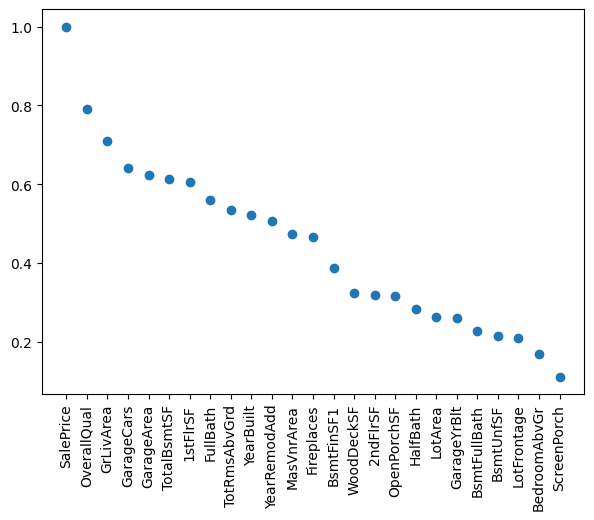

In [10]:
# Criando um Gráfico Para Exibição

import matplotlib.pyplot as plt


fig = plt.figure(figsize=(7, 5))

plt.scatter(VARIAVEL_SALEPRICE.index, VARIAVEL_SALEPRICE.values);
plt.xticks(rotation = 90)

Obtendo Dados Categóricos

In [11]:
# Obtendo Dados Categóricos

def ObterDadosCategoricos(*args, **kwargs):
   
   file_copy = pd.DataFrame(*kwargs.values())
   
   
   for i in args:
      ColunaNumerica = i[1]
      
   file_copy = file_copy.drop(axis=1, columns=ColunaNumerica)
   return pd.DataFrame(file_copy)

DataFrameCategorico = ObterDadosCategoricos(NumericFileAjustado_, file = data)
DataFrameCategorico.drop(axis=1, columns=['Alley', 'Street', 'MasVnrType', 'PoolQC', 'Fence', 'MiscFeature'])




,MSZoning,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,KitchenQual,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,SaleType,SaleCondition
0,RL,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,Gd,TA,PConc,Gd,TA,No,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,NaN,Attchd,RFn,TA,TA,Y,WD,Normal
1,RL,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,Gable,CompShg,MetalSd,MetalSd,TA,TA,CBlock,Gd,TA,Gd,ALQ,Unf,GasA,Ex,Y,SBrkr,TA,Typ,TA,Attchd,RFn,TA,TA,Y,WD,Normal
2,RL,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,Gd,TA,PConc,Gd,TA,Mn,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,TA,Attchd,RFn,TA,TA,Y,WD,Normal
3,RL,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,Gable,CompShg,Wd Sdng,Wd Shng,TA,TA,BrkTil,TA,Gd,No,ALQ,Unf,GasA,Gd,Y,SBrkr,Gd,Typ,Gd,Detchd,Unf,TA,TA,Y,WD,Abnorml
4,RL,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,Gd,TA,PConc,Gd,TA,Av,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,TA,Attchd,RFn,TA,TA,Y,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,RL,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,TA,TA,PConc,Gd,TA,No,Unf,Unf,GasA,Ex,Y,SBrkr,TA,Typ,TA,Attchd,RFn,TA,TA,Y,WD,Normal
1456,RL,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,Norm,1Fam,1Story,Gable,CompShg,Plywood,Plywood,TA,TA,CBlock,Gd,TA,No,ALQ,Rec,GasA,TA,Y,SBrkr,TA,Min1,TA,Attchd,Unf,TA,TA,Y,WD,Normal
1457,RL,Reg,Lvl,AllPub,Inside,Gtl,Crawfor,Norm,Norm,1Fam,2Story,Gable,CompShg,CemntBd,CmentBd,Ex,Gd,Stone,TA,Gd,No,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,Gd,Attchd,RFn,TA,TA,Y,WD,Normal
1458,RL,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,Hip,CompShg,MetalSd,MetalSd,TA,TA,CBlock,TA,TA,Mn,GLQ,Rec,GasA,Gd,Y,FuseA,Gd,Typ,NaN,Attchd,Unf,TA,TA,Y,WD,Normal


In [12]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
import numpy as np

# Criar Dados Categóricos em Numéricos e Criar uma Correlação Entre esses Dados

OneHot = OneHotEncoder(sparse_output=False)

DataFrameCodificado = pd.DataFrame(OneHot.fit_transform(DataFrameCategorico))
DataFrameCodificado.head(20)



,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256,257,258,259,260,261,262,263,264,265,266
0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0

In [13]:
# Criando uma Correlação desses Dados

np.array(DataFrameCodificado)

CorrDadosCategoricos = DataFrameCodificado.corr()
CorrDadosCategoricos.sum(axis=0)

0      1.914766
1     -0.965111
2      1.347133
3     -2.207211
4      2.251599
         ...   
262    1.980067
263    2.047299
264    0.395487
265   -1.447670
266   -0.760266
Length: 267, dtype: float64

# Processando Dados numéricos 

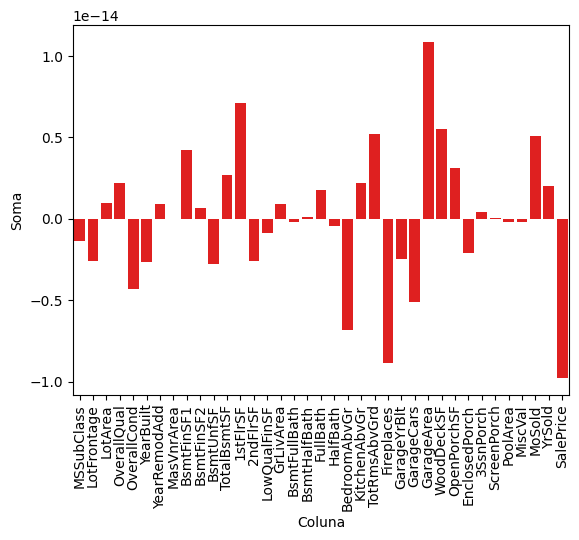

In [ ]:
import seaborn as sns

Standard = StandardScaler()

FileNumericAjustTrain = SaleCorr.drop(axis=1, columns=['Id'])

class TrainDataNumeric:
    def __init__(self, file):
        self.file = pd.DataFrame(file)
        self.X_train_numeric = np.array(FileNumericAjustTrain.iloc[:, :])
        self.y_train_numeric = np.array(FileNumericAjustTrain.iloc[:, -1])
        self.train = None
    
    def train_numeric(self):
        self.train = pd.DataFrame(Standard.fit_transform(self.X_train_numeric))
        return self.train
    
    def grafico_transform(self):
        
        columns_sum = self.train.sum(axis=0)
        plotData = pd.DataFrame({"Coluna": self.file.columns, 
                                 "Soma": columns_sum.values})
    

        sns.barplot(x='Coluna', y='Soma', data=plotData, color='red')
        plt.xticks(rotation = 90)
    
a = TrainDataNumeric(FileNumericAjustTrain)
a.train_numeric()
a.grafico_transform()



In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(a.X_train_numeric, a.y_train_numeric, test_size=0.2)



array([[-1.39781082e-01,  1.00738810e-01,  1.00000000e+00,
         1.05805742e-01, -5.63627027e-03,  1.42276518e-02,
         1.37884271e-02,  1.03320506e-01,  2.14103131e-01,
         1.11169745e-01, -2.61835995e-03,  2.60833135e-01,
         2.99474579e-01,  5.09859483e-02,  4.77896987e-03,
         2.63116167e-01,  1.58154531e-01,  4.80455709e-02,
         1.26030627e-01,  1.42594686e-02,  1.19689908e-01,
        -1.77838705e-02,  1.90014778e-01,  2.71364010e-01,
         7.25987680e-02,  1.54870740e-01,  1.80402755e-01,
         1.71697687e-01,  8.47738088e-02, -1.83397337e-02,
         2.04228296e-02,  4.31603777e-02,  7.76723919e-02,
         3.80676920e-02,  1.20498822e-03, -1.42614073e-02,
         2.63843354e-01],
       [ 4.03800648e-02,  2.21396241e-01,  1.90014778e-01,
         4.27452343e-01, -5.75831661e-02,  9.55891283e-02,
         1.91739816e-01,  2.79567888e-01,  4.43156239e-02,
        -3.52265479e-02,  2.50647061e-01,  2.85572564e-01,
         4.09515979e-01,  6.16

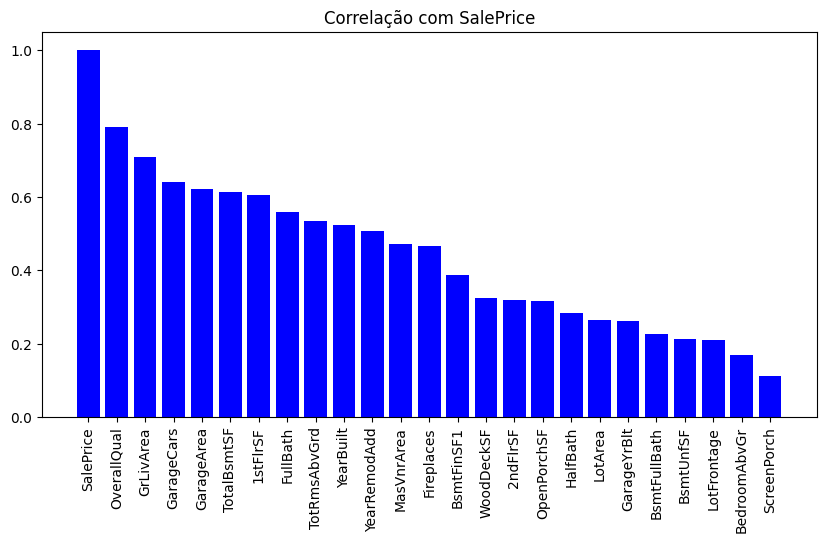

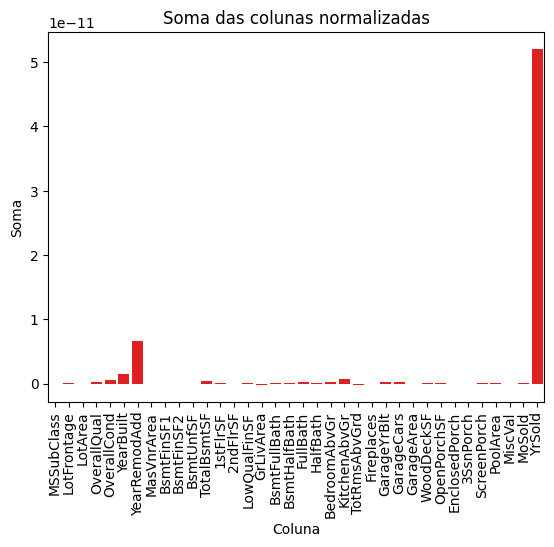

MSE: 1300424286.328392
R²: 0.8304603674991177
count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64
36061.3960673792


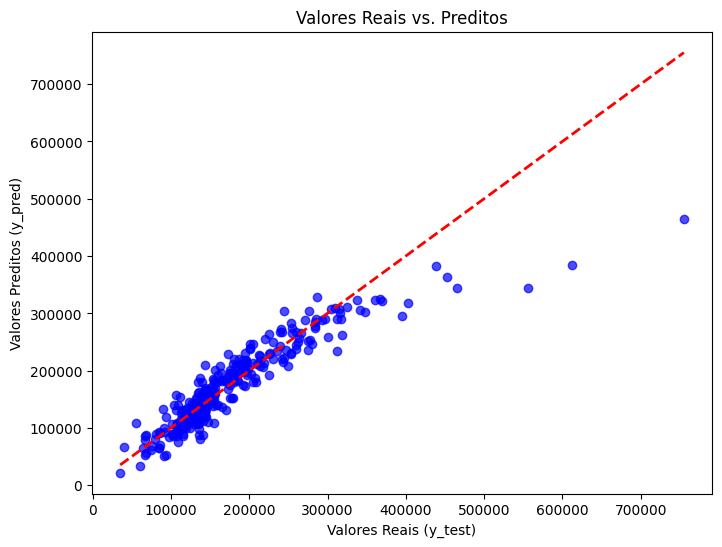

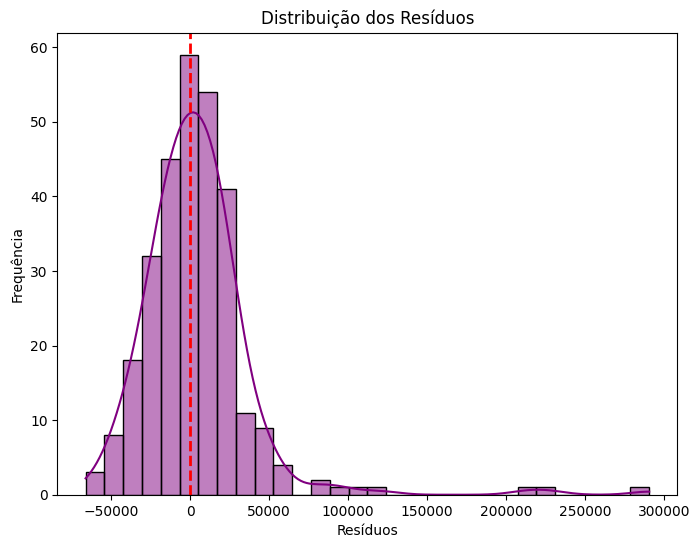

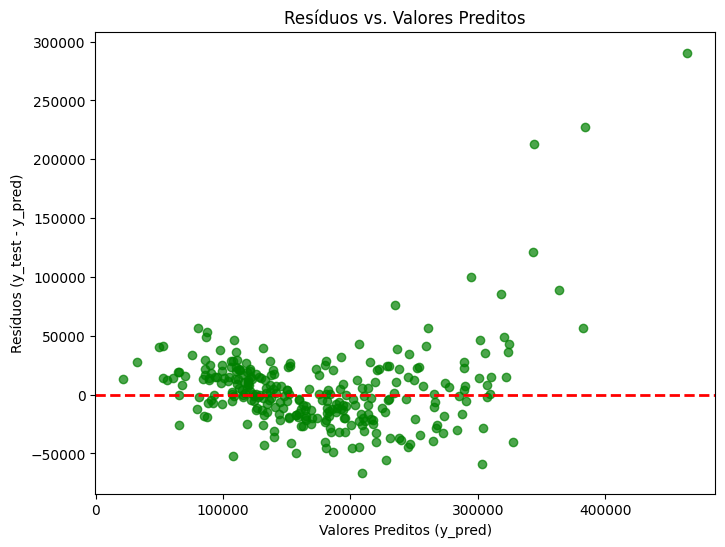

In [39]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np


# Configuração de exibição
pd.set_option('display.max_columns', None)

# Carregando os dados
data = pd.read_csv('train.csv')

# Função para obter dados numéricos
def ObterDadosNumericos(file):
    file_copy = file.copy()
    file_copy[['LotFrontage', 'MasVnrArea', 'GarageYrBlt']] = file_copy[
        ['LotFrontage', 'MasVnrArea', 'GarageYrBlt']
    ].fillna(0)

    # Selecionar colunas numéricas
    lista_numerica = file_copy.select_dtypes(include=[np.number])
    return lista_numerica.dropna(axis=1)

file_numerico = ObterDadosNumericos(data)

# Função para ajustar nomes das colunas
def TratarColunasText(var_tratar_columns, file_principal):
    var_tratar_columns.columns = file_principal.select_dtypes(include=[np.number]).columns
    return var_tratar_columns

file_numerico_ajustado = TratarColunasText(file_numerico, data)

# Calculando a correlação com SalePrice
corr = file_numerico_ajustado.corr()
sale_corr = corr[['SalePrice']][corr['SalePrice'] > 0.1].sort_values('SalePrice', ascending=False)

# Visualizando correlação com SalePrice
fig = plt.figure(figsize=(10, 5))
plt.bar(sale_corr.index, sale_corr['SalePrice'], color='blue')
plt.xticks(rotation=90)
plt.title('Correlação com SalePrice')
plt.show()

# Função para obter dados categóricos
def ObterDadosCategoricos(file, colunas_numericas):
    file_categorico = file.drop(columns=colunas_numericas)
    # Remover colunas categóricas irrelevantes
    colunas_irrelevantes = ['Alley', 'Street', 'MasVnrType', 'PoolQC', 'Fence', 'MiscFeature']
    file_categorico = file_categorico.drop(columns=colunas_irrelevantes, errors='ignore')
    return file_categorico

dataframe_categorico = ObterDadosCategoricos(data, file_numerico.columns)

# Convertendo dados categóricos para numéricos com OneHotEncoder
one_hot = OneHotEncoder(sparse_output=False)
dataframe_codificado = pd.DataFrame(one_hot.fit_transform(dataframe_categorico))
dataframe_codificado.columns = one_hot.get_feature_names_out(dataframe_categorico.columns)

# Criando a correlação com dados categóricos codificados
corr_dados_categoricos = dataframe_codificado.corr()

# Normalizando os dados com StandardScaler
file_numeric_ajust_train = file_numerico_ajustado.drop(columns=['Id'], errors='ignore')

class TrainDataNumeric:
    def __init__(self, file):
        self.file = pd.DataFrame(file)
        self.X_train_numeric = self.file.drop(columns=['SalePrice'])
        self.y_train_numeric = self.file['SalePrice']
        self.standard = StandardScaler()
        self.train = None
    
    def train_numeric(self):
        # Normalizando os dados
        self.train = pd.DataFrame(
            self.standard.fit_transform(self.X_train_numeric),
            columns=self.X_train_numeric.columns
        )
        return self.train
    
    def grafico_transform(self):
        # Criar gráfico com os dados normalizados
        columns_sum = self.train.sum(axis=0)
        plot_data = pd.DataFrame({"Coluna": self.train.columns, "Soma": columns_sum.values})
        sns.barplot(x='Coluna', y='Soma', data=plot_data, color='red')
        plt.xticks(rotation=90)
        plt.title("Soma das colunas normalizadas")
        plt.show()

# Instanciando e treinando
train_data_numeric = TrainDataNumeric(file_numeric_ajust_train)
train_data_numeric.train_numeric()
train_data_numeric.grafico_transform()



# Testando e Treinando Os Dados

X_train, X_test, y_train, y_test = train_test_split(train_data_numeric.X_train_numeric, train_data_numeric.y_train_numeric, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

# Fazendo previsões
y_pred = model.predict(X_test)

# Avaliação do modelo
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(1300424286.328392)
print(f"MSE: {mse}")
print(f"R²: {r2}")
print(data['SalePrice'].describe())
print(rmse)


plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.7, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--', linewidth=2)
plt.xlabel('Valores Reais (y_test)')
plt.ylabel('Valores Preditos (y_pred)')
plt.title('Valores Reais vs. Preditos')
plt.show()

# Calculando os resíduos
residuos = y_test - y_pred

plt.figure(figsize=(8, 6))
sns.histplot(residuos, kde=True, bins=30, color='purple')
plt.axvline(0, color='red', linestyle='--', linewidth=2)
plt.title('Distribuição dos Resíduos')
plt.xlabel('Resíduos')
plt.ylabel('Frequência')
plt.show()

plt.figure(figsize=(8, 6))
plt.scatter(y_pred, residuos, alpha=0.7, color='green')
plt.axhline(0, color='red', linestyle='--', linewidth=2)
plt.xlabel('Valores Preditos (y_pred)')
plt.ylabel('Resíduos (y_test - y_pred)')
plt.title('Resíduos vs. Valores Preditos')
plt.show()



